In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("./data/Cannabis_Retail_Sales_by_Week_Ending.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Week Ending                        88 non-null     object 
 1   Adult-Use Retail Sales             88 non-null     float64
 2   Medical Marijuana Retail Sales     88 non-null     float64
 3   Total Adult-Use and Medical Sales  88 non-null     float64
 4   Adult-Use Products Sold            88 non-null     int64  
 5   Medical Products Sold              88 non-null     int64  
 6   Total Products Sold                88 non-null     int64  
 7   Adult-Use Average Product Price    88 non-null     float64
 8   Medical Average Product Price      88 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 6.3+ KB


In [5]:
df['Week Ending'] = pd.to_datetime(df['Week Ending'])
df.set_index('Week Ending', inplace=True)

## Data Exploratory Analysis

### Correlation Matrix

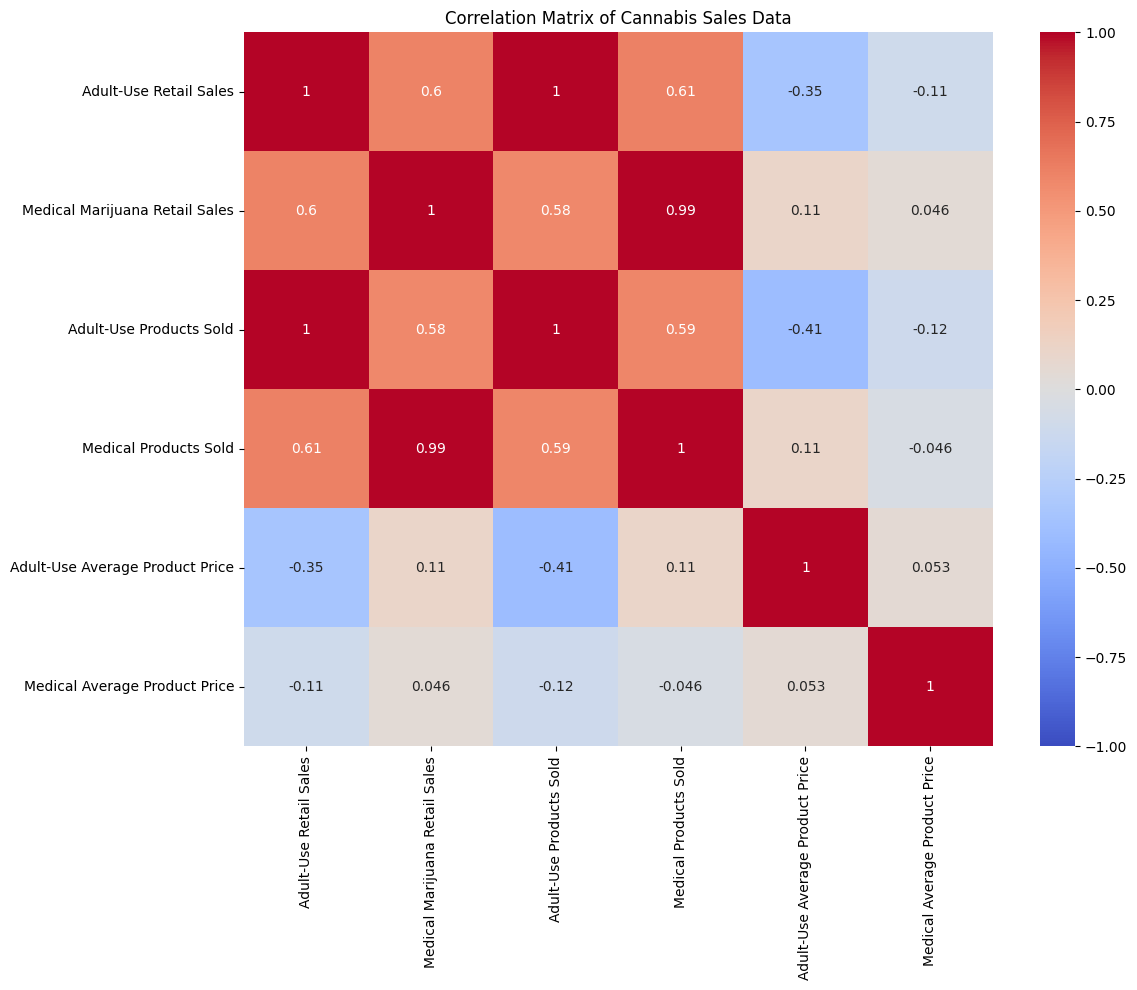


Correlation between Adult-Use and Medical Sales:
0.6043013993115701


In [6]:


# Select the numerical columns for correlation analysis
numeric_columns = ['Adult-Use Retail Sales', 'Medical Marijuana Retail Sales', 'Adult-Use Products Sold', 
                   'Medical Products Sold', 
                   'Adult-Use Average Product Price', 'Medical Average Product Price']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Cannabis Sales Data')
plt.tight_layout()
plt.show()



# Analyze specific correlations
print("\nCorrelation between Adult-Use and Medical Sales:")
print(correlation_matrix.loc['Adult-Use Retail Sales', 'Medical Marijuana Retail Sales'])



#### Correlation Heatmap
- Strong positive correlation between Adult-Use Retail Sales and Adult-Use Products Sold
- Moderate positive correlation between Medical Marijuana Retail Sales and Medical Products Sold
- Negative correlation between Adult-Use Average Product Price and Adult-Use Products Sold, indicating price elasticity in the adult-use market


#### Time Series

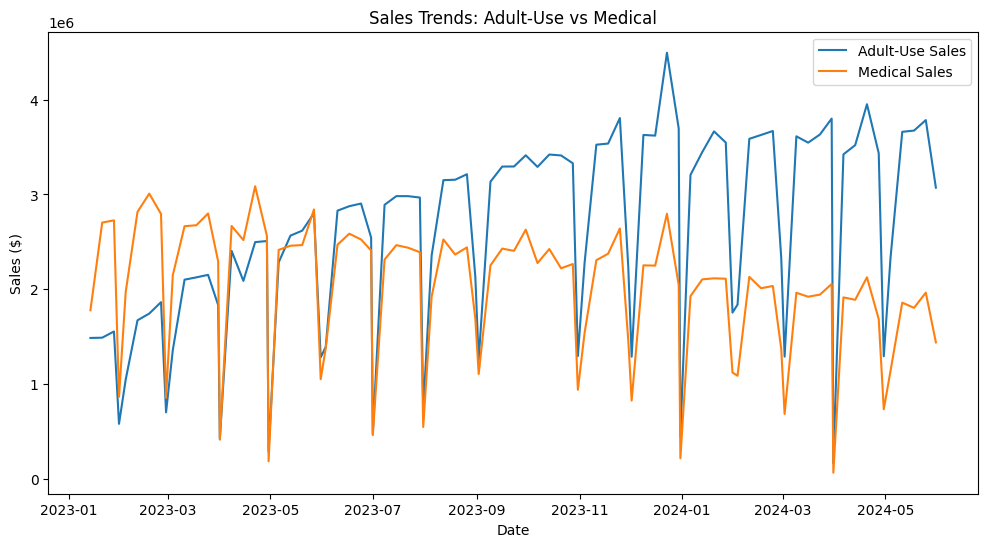

In [7]:
# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adult-Use Retail Sales'], label='Adult-Use Sales')
plt.plot(df.index, df['Medical Marijuana Retail Sales'], label='Medical Sales')
plt.title('Sales Trends: Adult-Use vs Medical')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


The data seems to show a clear seasonal pattern. However, the data show variation in the sale periods, with some observations covering only 3 days, particlularly at the end of months, while others represent a full week of sale. Aggregating the sales data  to a monthly level would help address the inconsistency in observation periods. This would also provide a more uniform time scale for analysis, smoothing out the variations caused by different reporting period within weeks.

## Monthly Data

In [9]:

# Resample to monthly data
monthly_data = df.resample('M').sum()


/tmp/ipykernel_12169/4257211600.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()


#### Box plot

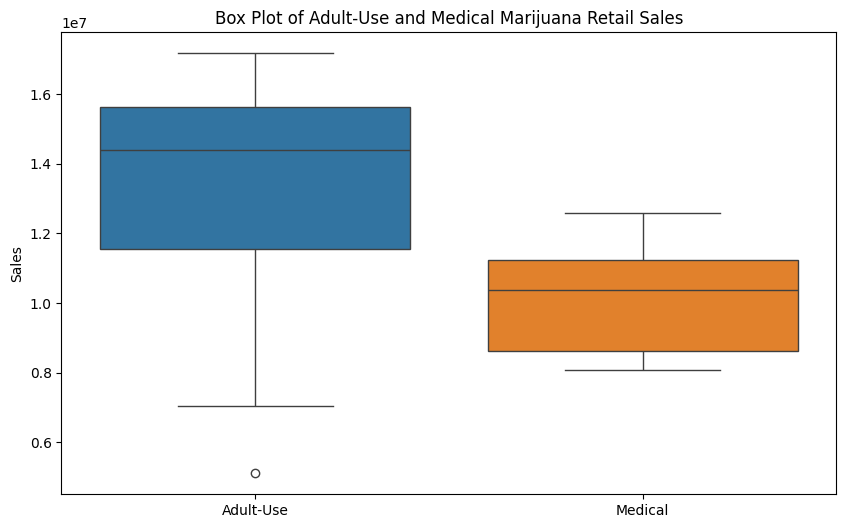

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_data[['Adult-Use Retail Sales', 'Medical Marijuana Retail Sales']])
plt.title('Box Plot of Adult-Use and Medical Marijuana Retail Sales')
plt.ylabel('Sales')
plt.xticks(ticks=[0, 1], labels=['Adult-Use', 'Medical'])
plt.show()


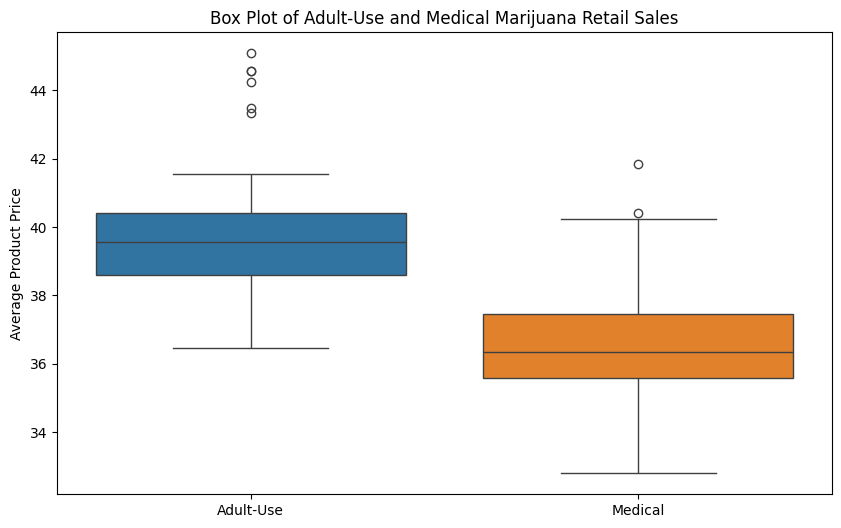

In [11]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Adult-Use Average Product Price', 'Medical Average Product Price']])
plt.title('Box Plot of Adult-Use and Medical Marijuana Retail Sales')
plt.ylabel('Average Product Price')
plt.xticks(ticks=[0, 1], labels=['Adult-Use', 'Medical'])
plt.show()

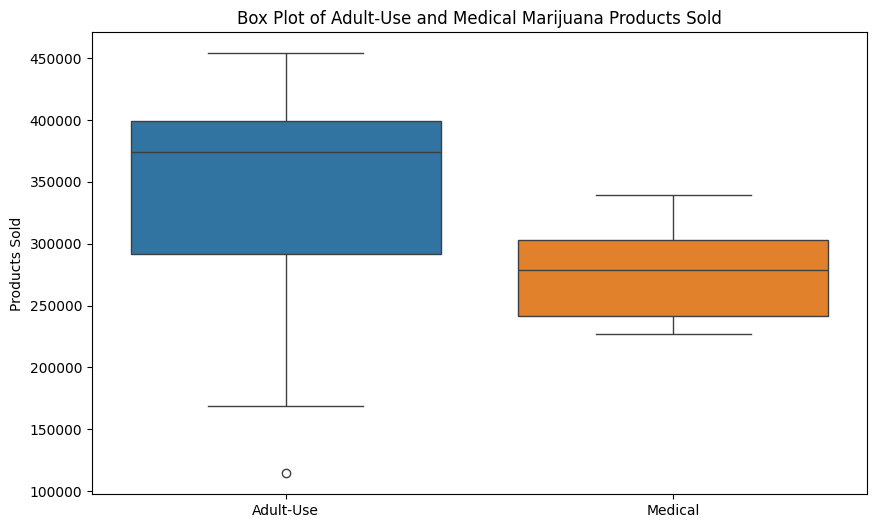

In [12]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_data[['Adult-Use Products Sold',  'Medical Products Sold']])
plt.title('Box Plot of Adult-Use and Medical Marijuana Products Sold')
plt.ylabel('Products Sold')
plt.xticks(ticks=[0, 1], labels=['Adult-Use', 'Medical'])
plt.show()

In [13]:

# Calculate growth rates
monthly_data['Adult_Growth'] = monthly_data['Adult-Use Retail Sales'].pct_change() * 100
monthly_data['Medical_Growth'] = monthly_data['Medical Marijuana Retail Sales'].pct_change() * 100



##### Adult-Use vs Medical Retail Sales
- Adult-Use Retail Sales have a higher median and wider range compared to Medical Marijuana Retail Sales
- Indicates greater variability and potentially higher overall sales volume in adult-use market
- Medical sales show a more compact distribution, suggesting more consistent sales patterns

##### Products Sold Comparison
- Adult-Use Products Sold show a larger interquartile range than Medical Products Sold
- Suggests more diverse purchasing patterns in the adult-use segment

##### Average Product Price Analysis
- Adult-Use Average Product Price has a lower median but more high-end outliers
- Implies generally cheaper adult-use products with instances of premium pricing


#### Time Series Plot

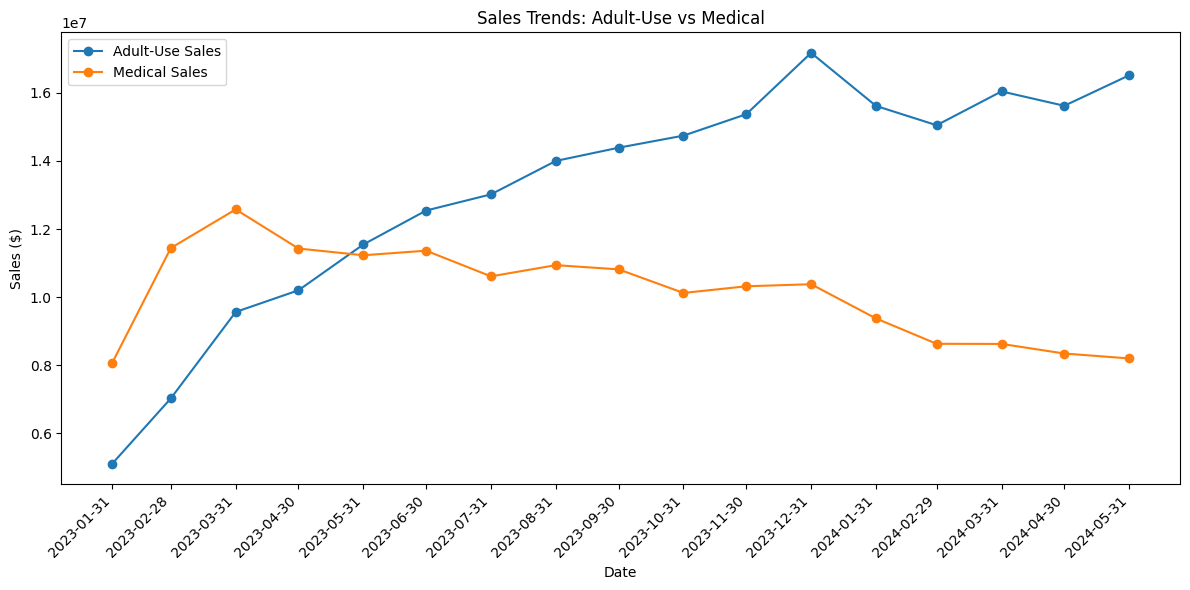

In [14]:
# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Adult-Use Retail Sales'], label='Adult-Use Sales', marker = 'o')
plt.plot(monthly_data.index, monthly_data['Medical Marijuana Retail Sales'], label='Medical Sales', marker = 'o')
plt.title('Sales Trends: Adult-Use vs Medical')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.xticks(monthly_data.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

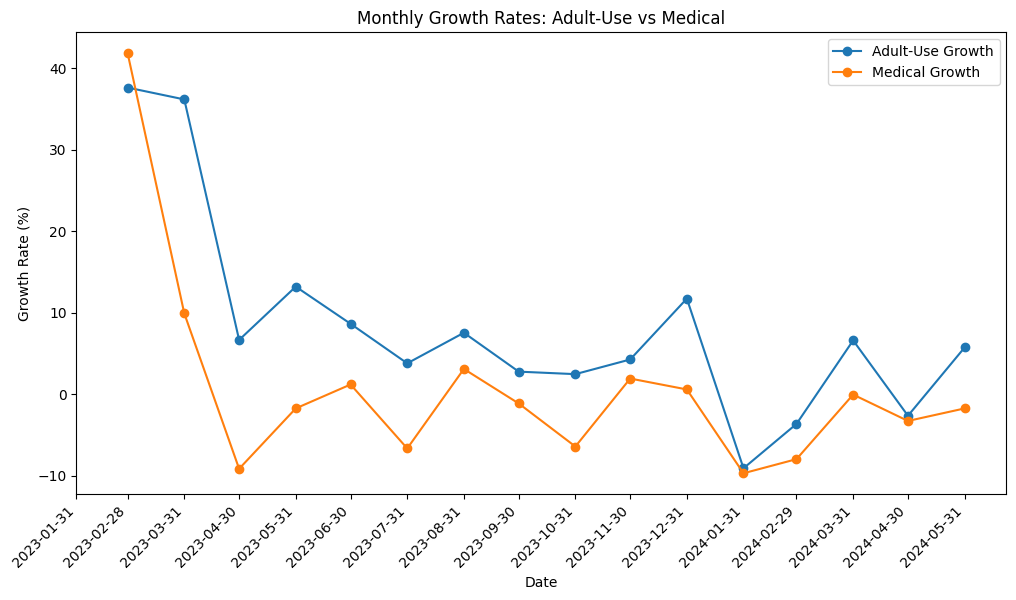

In [15]:
# Plot growth rates
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Adult_Growth'], label='Adult-Use Growth', marker = 'o')
plt.plot(monthly_data.index, monthly_data['Medical_Growth'], label='Medical Growth', marker = 'o')
plt.title('Monthly Growth Rates: Adult-Use vs Medical')
plt.xlabel('Date')
plt.xticks(monthly_data.index, rotation=45, ha='right')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()


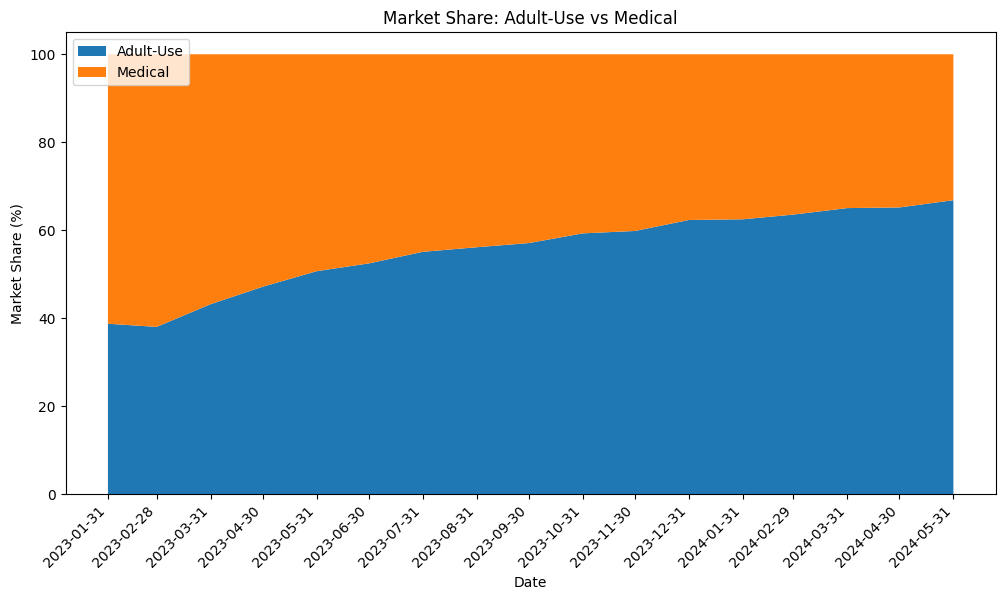

In [16]:
# Calculate market share
monthly_data['Adult_Share'] = monthly_data['Adult-Use Retail Sales'] / monthly_data['Total Adult-Use and Medical Sales'] * 100
monthly_data['Medical_Share'] = monthly_data['Medical Marijuana Retail Sales'] / monthly_data['Total Adult-Use and Medical Sales'] * 100

# Plot market share
plt.figure(figsize=(12, 6))
plt.stackplot(monthly_data.index, monthly_data['Adult_Share'], monthly_data['Medical_Share'], 
              labels=['Adult-Use', 'Medical'])
plt.title('Market Share: Adult-Use vs Medical')
plt.xlabel('Date')
plt.xticks(monthly_data.index, rotation=45, ha='right')
plt.ylabel('Market Share (%)')
plt.legend(loc='upper left')
plt.show()


##### Overall Trends
- Clear upward trend in both Adult-Use and Medical cannabis sales over time
- Adult-Use sales show more rapid growth compared to Medical sales

##### Market Comparison
- Adult-Use sales consistently outperform Medical sales in volume
- Gap between Adult-Use and Medical sales is widening over time

##### Sales Patterns
- Visible fluctuations in both sales types
- Short-term volatility present, with occasional spikes and dips

##### Data Limitations
- 88 observations (17 monthly observations) provide a snapshot of market trends
- Limited sample size restricts ability to confirm long-term patterns or seasonality


## Modelling

The business problem is to predict future Medical Marijuanna Retail Sales. Accurate forecasting allows for etter inventory management, reducing waste and ensuring product availaility. 

### XGBoost Model

In [22]:
# Usage:
features_to_scale = ['Year',"Dayofmonth", "Dayofyear", 'Adult-Use Average Product Price', 'Medical Average Product Price']

features = ['Week', "Dayofweek", "Dayofmonth", "Dayofyear",
            'Year', 'Quarter', 'Adult-Use Average Product Price', 'Medical Average Product Price']

target = 'Medical Marijuana Retail Sales'

def create_feature(df):
    df['Week'] = df['Week Ending'].dt.isocalendar().week
    df['Year'] = df['Week Ending'].dt.year
    df['Quarter'] = df['Week Ending'].dt.quarter
    df['Month'] = df['Week Ending'].dt.month
    df["Dayofweek"] = df['Week Ending'].dt.dayofweek
    df["Dayofmonth"] = df['Week Ending'].dt.day
    df["Dayofyear"] = df['Week Ending'].dt.dayofyear

    X = df[features]
    y = df[target]
    return df

from sklearn.preprocessing import StandardScaler

def prep_data(df, features, features_to_scale, target):
    ## Feature Scaling 
    df.reset_index(inplace=True)
    df = create_feature(df)

    if len(features_to_scale) > 0:
        scaler = StandardScaler()
        df_scaled = df.copy()
        df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    else:
        df_scaled = df.copy()
        scaler = 'No scaler needed'
    
    X = df_scaled[features]
    y = df_scaled[target]
    
    return X,y

In [25]:
from sklearn.model_selection import train_test_split, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X, y = prep_data(df, features, features_to_scale, target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, pred)
print(f'RMSE: {rmse}')
print(f"Mean Squared Error: {mse}")



RMSE: 309432.3550837238
Mean Squared Error: 95748382372.65973


### ARIMA

RMSE: 448204.03733336687
MSE: 200886859081.9301


/tmp/ipykernel_12169/1728251885.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Week Ending')['Medical Marijuana Retail Sales'].sum()


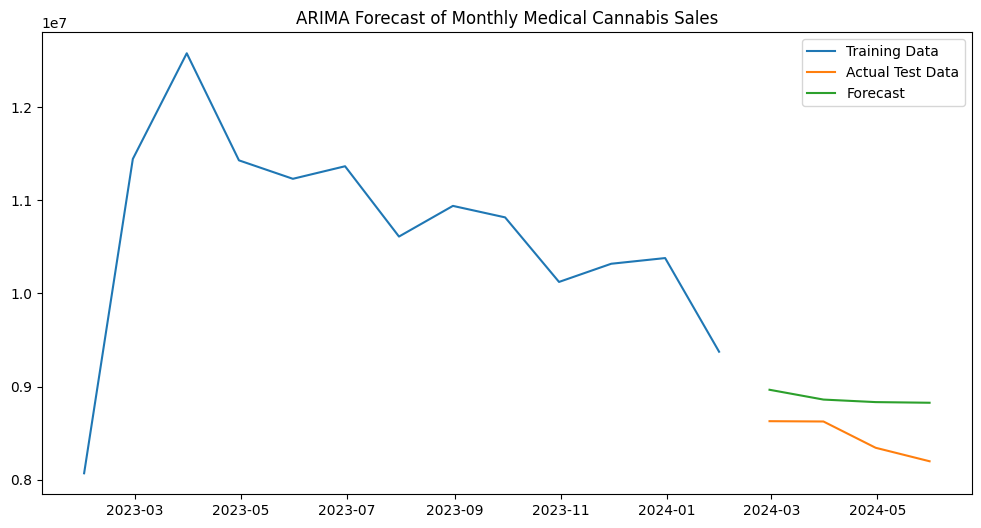

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
monthly_sales = df.resample('M', on='Week Ending')['Medical Marijuana Retail Sales'].sum()

# Split the data
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))  # You may need to adjust these parameters
results = model.fit()

# Make predictions
forecast = results.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))


print(f'RMSE: {rmse}')
print(f'MSE: {mean_squared_error(test, forecast)}')


# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast of Monthly Medical Cannabis Sales')
plt.legend()
plt.show()


Given the size of the dataset, ARIMA and XGBOOST are used to predict the future sales. XGBoost is used to predict sale in the next time point whereas ARIMA is used to predict sale in the next month.
Since XGBoost yields lower root mean squared errors, it is chosen to train the data. All of the training steps including preprocessing, cross-validation, hyper parameter tuning and model training are done in `training.py`
